## Simulando e analisando um jogo de Monopoly

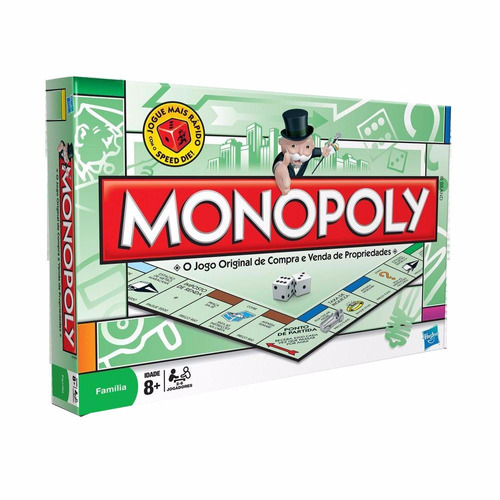

In [ ]:
# Importação das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import random

In [89]:
# Criando os dados
def dados():
  # Função gera a soma de dois números aleatórios de 1 a 6
  return np.random.randint(1,7) + np.random.randint(1,7)

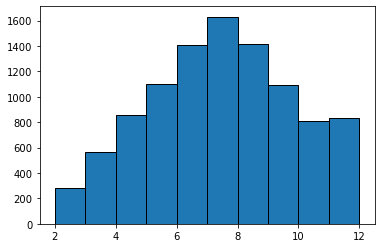

In [90]:
# Visualizando a distribuição dos resultados dos dados
resultados_dados = [dados() for i in range(10000)]

plt.hist(resultados_dados, bins = 10, edgecolor = 'black')
plt.show()

### Considerando-se essas posições do tabuleiro

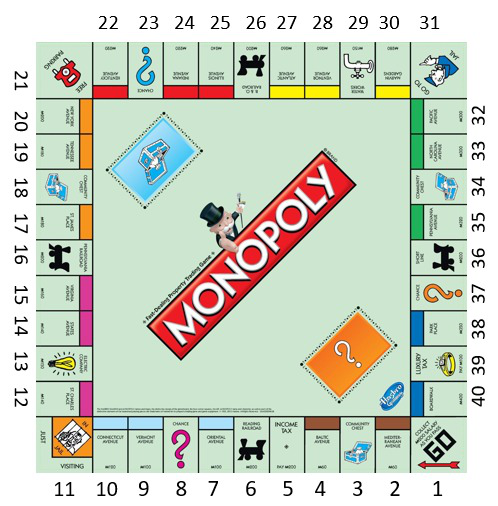

In [91]:
# Determinando a posição no tabuleiro
posicao = [1] # Todos começam da posição 1

for i in range(15):
    valor = dados() # A cada iteração, sorteia-se o valor dos dados
    print(valor)
    posicao.append(posicao[-1] + valor) # Atualizando a lista de casas em que o jogador para a cada iteração
print(posicao)

2
8
7
7
9
7
7
9
11
4
7
5
5
5
2
[1, 3, 11, 18, 25, 34, 41, 48, 57, 68, 72, 79, 84, 89, 94, 96]


In [106]:
# Quando o jogador para na 40ª casa ele retorna ao início
posicao = [1]

for i in range(10000):
    valor = dados()
    nova_posicao = posicao[-1] + valor
    if nova_posicao <= 40:
        posicao.append(nova_posicao)
    else:
        nova_posicao = valor - (40 - posicao[-1])
        posicao.append(nova_posicao)
   

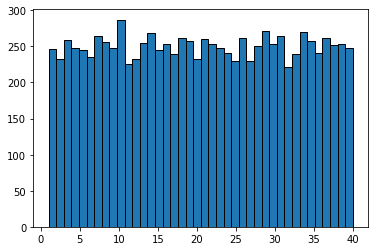

In [107]:
plt.hist(posicao, bins = 40, edgecolor = 'black')
plt.show()

# Printar mais vezes

In [94]:
# Simulando a casa de "Vá para a cadeia"

posicao = [1]

for i in range(10000):
    valor = dados()
    nova_posicao = posicao[-1] + valor
    if nova_posicao == 31: # Casa "vá para a cadeia"
        posicao.append(11) # Casa da cadeia
    if nova_posicao <= 40:
        posicao.append(nova_posicao)
    else:
        nova_posicao = valor - (40 - posicao[-1])
        posicao.append(nova_posicao)

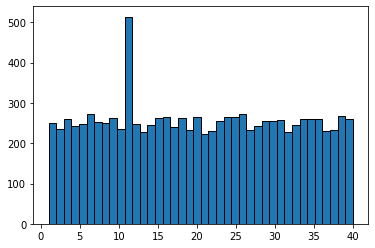

In [95]:
plt.hist(posicao, bins = 40, edgecolor = 'black')
plt.show()

### No entanto, também precisamos considerar o efeito das cartas "cofre" e "sorte"

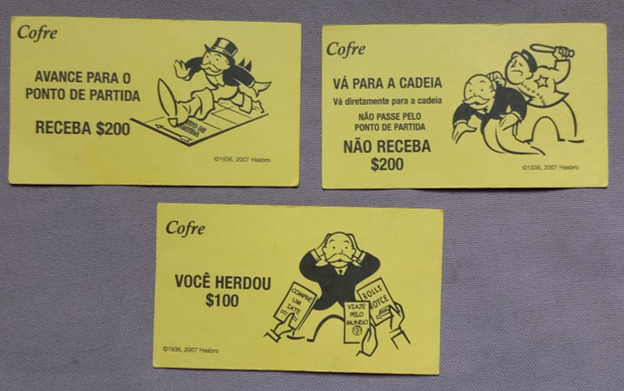

In [96]:
# Criando uma função para cartas "Cofre" 
def cartas_cofre(nova_posicao):
    cofre = np.random.randint(1,17)# Existem 16 cartas "Cofre" no jogo, sendo que apenas duas movimentam o jogador
    if cofre == 1:  # Caso em que a carta retirada envia para o ponto de partida
        nova_posicao = 1
    elif cofre == 11: # Caso em que a carta retirada envia para a cadeia
        nova_posicao = 11 
    else: 
        nova_posicao = nova_posicao
    return nova_posicao

#### Criação das cartas "sorte"

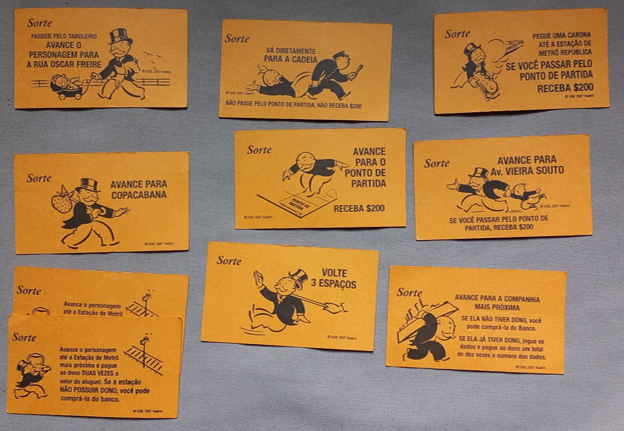

In [97]:
# Criando uma função para cartas "Sorte"
dict_sorte = {1:1, 2:11, 3:12, 4:25, 5:36, 6:40,  # Cartas que te movem para uma casa específica 
              7:random.choice([6, 16, 26, 36]), 8:random.choice([6, 16, 26, 36]), # Cartas que levam para a estação mais próxima
              9:random.choice([12,29]), # Carta que leva para a companhia mais próxima
              10:-3, # Volte 3 espaços
              11:201, 12:202, 13:203, 14:204, 15:205, 16:206} # Cartas que não te movem no tabuleiro. Values simbólicos

def cartas_sorte(nova_posicao):
    sorte = np.random.randint(1,17) # Existem 16 cartas "Sorte"
    if sorte in range(1,10):
        nova_posicao = dict_sorte[sorte]
    elif sorte == 10:
        nova_posicao = nova_posicao - 3
    else:
        nova_posicao = nova_posicao
    return nova_posicao

In [102]:
# Adicionando as casas "Cofre" e "Sorte"
posicao_cofre = [3, 18, 34] # Posição das casas "Cofre" no tabuleiro
posicao_sorte = [8, 23, 37] # Posição das casas "Sorte" no tabuleiro
posicao = [1]

for i in range(1000000):
    valor = dados()
    nova_posicao = posicao[-1] + valor
    if nova_posicao == 31: # Casa "Vá para a cadeia"
        nova_posicao = 11
    elif nova_posicao > 40:
        nova_posicao = valor - (40 - posicao[-1])
    elif nova_posicao in posicao_cofre: # Se o jogador caiu numa casa "Cofre"
        cartas_cofre(nova_posicao)
    elif nova_posicao in posicao_sorte: # Se o jogador caiu numa casa "Sorte"
        cartas_sorte(nova_posicao)
    posicao.append(nova_posicao)

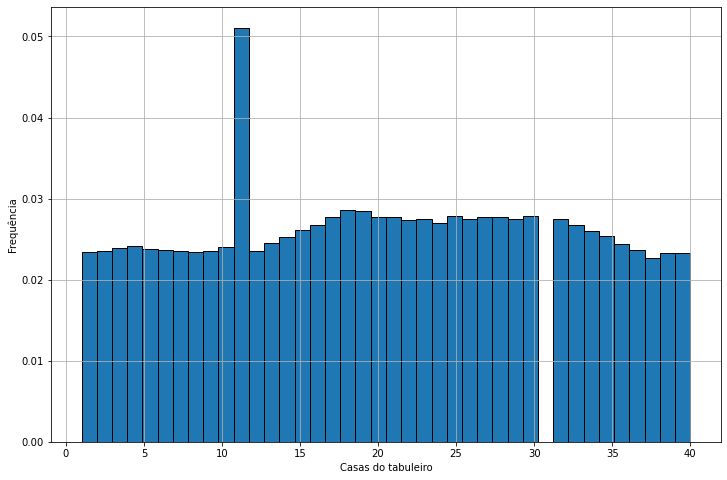

In [103]:
plt.figure(figsize=(12, 8))
plt.hist(posicao, bins = 40, edgecolor = 'black', density = True)
plt.xlabel('Casas do tabuleiro')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [ ]:
# Casa "Vá para a cadeia" não possui frequência pois imediatamente envia o jogador para a cadeia
# Casas "Sorte" possuem uma frequência muito baixa porque a maioria delas envia o jogador para outra 

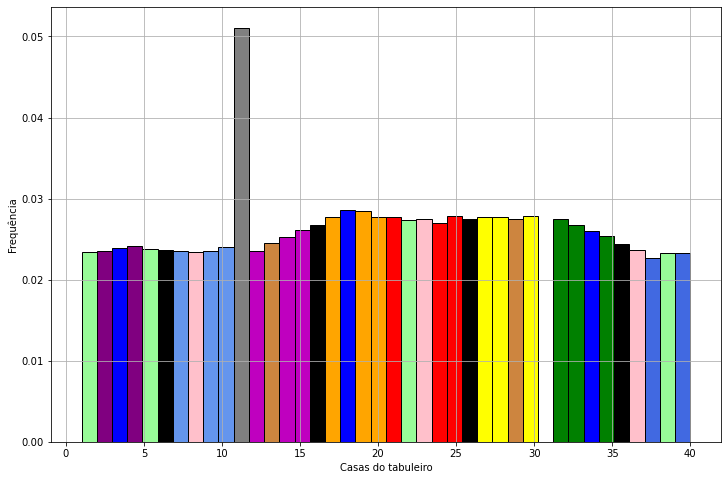

In [104]:
plt.figure(figsize=(12, 8))
n, bins, patches = plt.hist(posicao, bins = 40, edgecolor = 'black', density = True)

patches[0].set_fc('palegreen')
patches[1].set_fc('purple')
patches[2].set_fc('blue')
patches[3].set_fc('purple')
patches[4].set_fc('palegreen')
patches[5].set_fc('black')
patches[6].set_fc('cornflowerblue')
patches[7].set_fc('pink')
patches[8].set_fc('cornflowerblue')
patches[9].set_fc('cornflowerblue')
patches[10].set_fc('gray')
patches[11].set_fc('m')
patches[12].set_fc('peru')
patches[13].set_fc('m')
patches[14].set_fc('m')
patches[15].set_fc('black')
patches[16].set_fc('orange')
patches[17].set_fc('blue')
patches[18].set_fc('orange')
patches[19].set_fc('orange')
patches[20].set_fc('red')
patches[21].set_fc('palegreen')
patches[22].set_fc('pink')
patches[23].set_fc('red')
patches[24].set_fc('red')
patches[25].set_fc('black')
patches[26].set_fc('yellow')
patches[27].set_fc('yellow')
patches[28].set_fc('peru')
patches[29].set_fc('yellow')
patches[31].set_fc('green')
patches[32].set_fc('green')
patches[33].set_fc('blue')
patches[34].set_fc('green')
patches[35].set_fc('black')
patches[36].set_fc('pink')
patches[37].set_fc('royalblue')
patches[38].set_fc('palegreen')
patches[39].set_fc('royalblue')

plt.xlabel('Casas do tabuleiro')
plt.ylabel('Frequência')
plt.grid()
plt.show()